# Chapter 8: How to analyze the data

In [2]:
import pandas as pd
import seaborn as sns

## How to melt columns to create long data

In [4]:
cars = pd.read_pickle('cars.pkl')

In [5]:
cars.head()

,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


In [9]:
cars_melt = cars.melt(id_vars=['aspiration','carbody','price'], 
                     value_vars=['enginesize','curbweight'], 
                     var_name='feature')

## How to plot melted columns

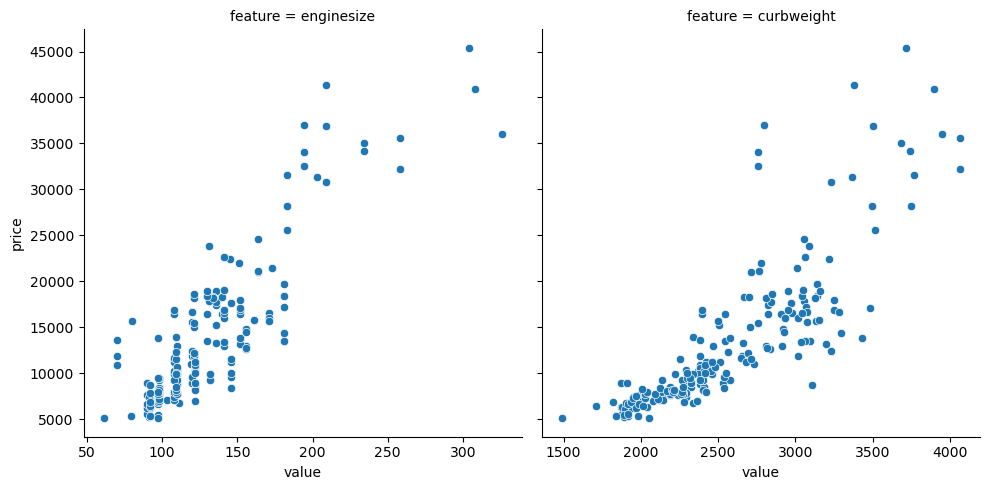

In [14]:
sns.relplot(data=cars_melt, x='value', y='price',
           col='feature', facet_kws={'sharex':False})

In [20]:
cars['priceRank'] = cars.price.rank()

In [23]:
cars.sort_values('price').head(10)

,aspiration,carbody,enginesize,curbweight,price,priceRank
138,std,hatchback,97,2050,5118.0,1.0
18,std,hatchback,61,1488,5151.0,2.0
50,std,hatchback,91,1890,5195.0,3.0
150,std,hatchback,92,1985,5348.0,4.0
76,std,hatchback,92,1918,5389.0,5.0
32,std,hatchback,79,1837,5399.0,6.0
89,std,sedan,97,1889,5499.0,7.0
118,std,hatchback,90,1918,5572.0,8.5
21,std,hatchback,90,1876,5572.0,8.5
51,std,hatchback,91,1900,6095.0,10.0


In [26]:
cars['priceGrade'] = pd.qcut(cars.price, q=3, labels=['low','medium','high'])

In [29]:
cars.priceGrade.value_counts()

priceGrade
medium    69
low       68
high      68
Name: count, dtype: int64

In [32]:
cars.groupby('priceGrade', observed=True).price.agg(['min','max'])

,min,max
priceGrade,,
low,5118.0,8358.0
medium,8449.0,13860.0
high,13950.0,45400.0


In [35]:
cars.groupby(['carbody','aspiration']).price.mean()

carbody      aspiration
convertible  std           21890.500000
hardtop      std           21356.000000
             turbo         28176.000000
hatchback    std            9699.605263
             turbo         13345.243615
sedan        std           13660.371795
             turbo         17307.833333
wagon        std           10973.600000
             turbo         17965.400000
Name: price, dtype: float64

In [38]:
cars.groupby(['carbody','aspiration']).price.mean().unstack()

aspiration,std,turbo
carbody,,
convertible,21890.500000,NaN
hardtop,21356.000000,28176.000000
hatchback,9699.605263,13345.243615
sedan,13660.371795,17307.833333
wagon,10973.600000,17965.400000


In [41]:
cars.pivot_table(index='carbody', columns='aspiration', values='price', aggfunc='mean')

aspiration,std,turbo
carbody,,
convertible,21890.500000,NaN
hardtop,21356.000000,28176.000000
hatchback,9699.605263,13345.243615
sedan,13660.371795,17307.833333
wagon,10973.600000,17965.400000


<Axes: xlabel='carbody'>

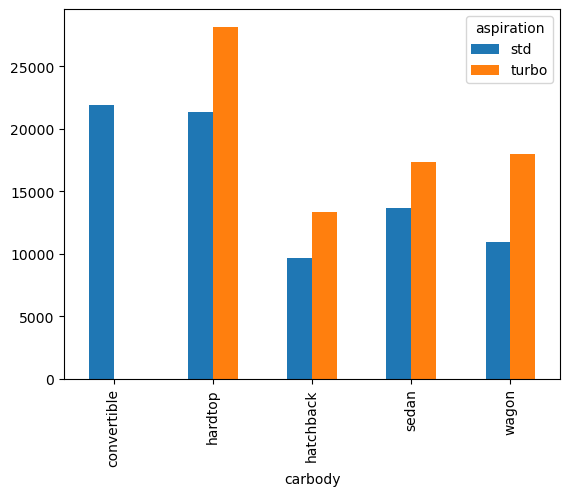

In [44]:
cars.pivot_table(index='carbody', columns='aspiration', values='price', aggfunc='mean').plot.bar()